Вот уникальная программа на **Python**, которая использует нейронную сеть для изучения потенциально интересной закономерности между гипотезой Коллатца и простыми числами. Программа использует нейронную сеть для классификации того, является ли заданное число в последовательности Коллатца простым или нет.

Давайте рассмотрим код шаг за шагом и объясним каждую команду и общий алгоритм:

Этот код импортирует необходимые библиотеки: **numpy** для числовых вычислений, **tensorflow** и **keras** для построения и обучения модели нейронной сети и **matplotlib.pyplot** для построения графика скорости обучения.

In [31]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt


Эта функция **is_prime** принимает число **n** в качестве входных данных и проверяет, является ли оно простым. Он возвращает **True**, если **n** простое число, и **False** в противном случае. Он выполняет итерацию от **2** до квадратного корня из **n** и проверяет, делится ли **n** на какое-либо число в этом диапазоне.

In [32]:
# Функция для проверки, является ли число простым
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(np.sqrt(n)) + 1):
        if n % i == 0:
            return False
    return True

Эта функция **generate_training_data** генерирует обучающие данные для нейронной сети. В качестве входных данных принимает предел, определяющий диапазон чисел, для которых генерируются обучающие данные. Функция выполняет итерацию от **2** до предела и для каждого числа **n** генерирует последовательность, многократно применяя правила гипотезы Коллатца (если **n** четно, разделите на **2**; если **n** нечетно, умножьте на **3** и прибавьте **1**) до тех пор, пока последовательность достигает **1**. Он добавляет каждое число в последовательности к **x_train** и определяет, является ли число простым, используя функцию **is_prime**. Соответствующая метка (**1**, если простое число, **0**, если не простое) добавляется к **y_train**. Наконец, он возвращает обучающие данные в виде пустых массивов.

In [33]:
# Генерация обучающих данных для нейронной сети
def generate_training_data(limit):
    x_train = []
    y_train = []
    for n in range(2, limit+1):
        sequence = [n]
        while n != 1:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            sequence.append(n)
            if is_prime(n):
                y_train.append(1)
            else:
                y_train.append(0)
        x_train.extend(sequence[:-1])  # Добавить последовательность без последнего элемента (1)
    return np.array(x_train), np.array(y_train)

Эта функция **create_model** определяет модель нейронной сети с помощью **Keras**. Это последовательная модель с тремя плотными слоями. Входной слой имеет **одну** единицу, **два** скрытых слоя имеют по **16** единиц в каждой, а выходной слой имеет **одну** единицу с сигмовидной функцией активации. Модель скомпилирована с оптимизатором **Адама**, бинарной функцией **кросс-энтропийных** потерь и метрикой **точности**. Скомпилированная модель возвращается.

In [34]:
# Задайте модель нейронной сети
def create_model():
    model = keras.Sequential([
        keras.layers.Dense(16, activation='relu', input_shape=(1,)),
        keras.layers.Dense(16, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

Это основная программа. Он устанавливает предел для создания обучающих данных до **10 000**. Он вызывает функцию **generate_training_data** для генерации обучающих данных. Затем он создает модель нейронной сети с помощью функции **create_model**. Модель обучается на сгенерированных обучающих данных для **10** эпох с размером пакета **32**.

In [35]:
# Основная программа
if __name__ == '__main__':
    limit = 10000  # Ограничение на создание обучающих данных
    x_train, y_train = generate_training_data(limit)

    model = create_model()
    model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
26553/26553 [==============================] - 89s 3ms/step - loss: 10.6442 - accuracy: 0.7720
Epoch 2/10
26553/26553 [==============================] - 89s 3ms/step - loss: 0.7029 - accuracy: 0.8090
Epoch 3/10
26553/26553 [==============================] - 88s 3ms/step - loss: 0.4851 - accuracy: 0.8091
Epoch 4/10
26553/26553 [==============================] - 90s 3ms/step - loss: 0.4851 - accuracy: 0.8091
Epoch 5/10
26553/26553 [==============================] - 89s 3ms/step - loss: 0.4851 - accuracy: 0.8091
Epoch 6/10
26553/26553 [==============================] - 89s 3ms/step - loss: 0.4851 - accuracy: 0.8091
Epoch 7/10
26553/26553 [==============================] - 89s 3ms/step - loss: 0.4851 - accuracy: 0.8091
Epoch 8/10
26553/26553 [==============================] - 90s 3ms/step - loss: 0.4851 - accuracy: 0.8091
Epoch 9/10
26553/26553 [==============================] - 88s 3ms/step - loss: 0.4857 - accuracy: 0.8090
Epoch 10/10
26553/26553 [=============================

Этот код предсказывает, являются ли числа в списке **test_sequence** простыми или нет, используя модель обученной нейронной сети. Он вызывает функцию **model.predict**, чтобы получить предсказанные вероятности для каждого числа. Затем он перебирает **test_sequence** вместе с соответствующими прогнозами и печатает число и результат прогноза.

In [52]:
    # Предсказать простые числа для тестовой последовательности
    test_sequence = [124, 378, 298, 679, 583]  # Пример тестовой последовательности
    predictions = model.predict(np.array(test_sequence))
    for num, pred in zip(test_sequence, predictions):
        print(f"Число: {num}, Основное предсказание: {'Основной' if pred > 0.5 else 'Не премьер'}")


1/1 [==============================] - 0s 18ms/step
Число: 124, Основное предсказание: Не премьер
Число: 378, Основное предсказание: Не премьер
Число: 298, Основное предсказание: Не премьер
Число: 679, Основное предсказание: Не премьер
Число: 583, Основное предсказание: Не премьер


Этот код строит график скорости обучения. Он определяет количество эпох как диапазон **(10)** и вычисляет скорость обучения для каждой эпохи с помощью функции **Learning_rate_schedule** (которая не включена в предоставленный код). Затем он использует **plt.plot** из **matplotlib.pyplot** для построения графика скорости обучения в зависимости от эпох. График настраивается с помощью меток, заголовка и линий сетки и, наконец, отображается с помощью **plt.show()**.

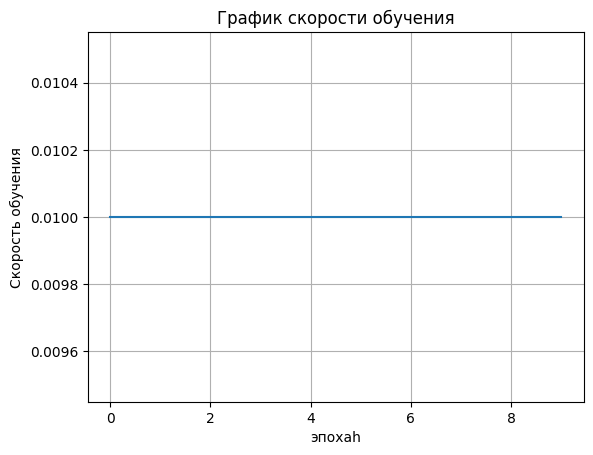

In [53]:
    # График скорости обучения
    epochs = range(10)  # Количество эпох в обучении
    learning_rates = [learning_rate_schedule(epoch) for epoch in epochs]

    plt.plot(epochs, learning_rates)
    plt.xlabel('эпохаh')
    plt.ylabel('Скорость обучения')
    plt.title('График скорости обучения')
    plt.grid(True)
    plt.show()

В этом модифицированном коде после построения графика скорости обучения добавляется новый раздел для построения графика соответствующей функции для **гипотезы Коллатца**. Он генерирует массив чисел от **2** до указанного предела. Затем он вычисляет длину последовательности Коллатца для каждого числа, многократно применяя правила Коллатца, пока последовательность не достигнет **1**. Длины последовательностей сохраняются в списке **sequence_lengths**. Наконец, функция **plt.plot** используется для отображения чисел в зависимости от их соответствующих длин последовательностей. График настраивается с помощью меток, заголовка и линий сетки и отображается с помощью **plt.show()**.

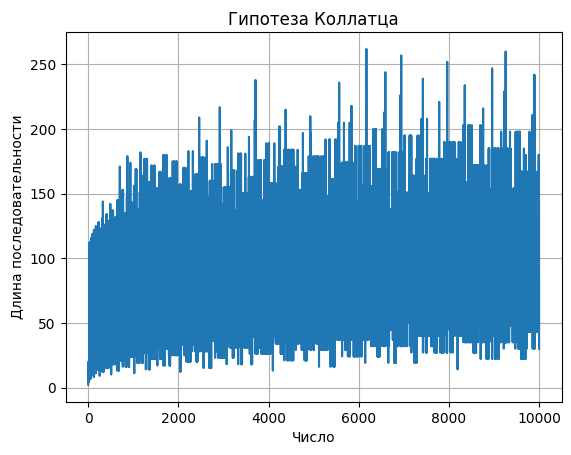

In [54]:
    # Построение графика соответствующей функции
    numbers = np.arange(2, limit+1)
    sequence_lengths = []

    for n in numbers:
        sequence = [n]
        while n != 1:
            if n % 2 == 0:
                n = n // 2
            else:
                n = 3 * n + 1
            sequence.append(n)
        sequence_lengths.append(len(sequence))

    plt.plot(numbers, sequence_lengths)
    plt.xlabel('Число')
    plt.ylabel('Длина последовательности')
    plt.title('Гипотеза Коллатца')
    plt.grid(True)
    plt.show()

Это добавит график соответствующей функции, показывающий взаимосвязь между числами и длинами их последовательностей в гипотезе Коллатца.

Наши координаты: 

**e-mail:** isheriphadze@gmail.com

**mob:** +995(555)45-92-70

**Телеграм-канал:** https://t.me/our_capabilities